# Análisis Comparativo de Métodos de Clustering para Segmentación de Clientes
## K-Means vs Clustering Jerárquico - Préstamos Automóviles LaboralKutxa

**Objetivo:** Determinar el método de clustering más apropiado para la segmentación de clientes mediante comparación rigurosa de K-Means y Clustering Jerárquico.

**Dataset:** 50,844 préstamos automóvil  
**Métodos evaluados:** K-Means, Agglomerative Clustering (Ward, Average, Complete linkage)  
**Fecha:** Enero 2026

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
# Visualización
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# use seaborn plotting defaults
import seaborn as sns; sns.set_theme()

# Manipulación de datos
import pandas as pd
import numpy as np

#Escalar datos
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#Distancia inter-intra cluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [12]:
df = pd.read_csv('Datos/Transformados/df_limpio.csv',index_col="ID")

df.head()

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,Posesion_Hipoteca,Personas_Cargo,Fiador,Impago,Prima,Tipo_Jornada_Laboral_Desempleado,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Divorciado,Estado_Civil_Soltero
ID,,,,,,,,,,,,,,,,,,,,
S97R7X,18,16000,5000,397,19,1,8.0600,48,0.1000,0,1,0,0,0,15.0000,False,False,False,False,True
RLGTBY,50,62116,37278,486,217,3,21.9600,12,0.5500,1,1,0,1,1,15.0000,False,False,True,False,False
SKE2P9,37,37602,44532,765,150,3,11.2000,60,0.2300,1,1,1,1,0,15.0000,False,False,True,False,False
E2FB1D,56,67410,23752,643,369,1,21.2400,24,0.1800,1,0,1,0,0,15.0000,False,False,False,False,False
TKSCGH,35,35930,28440,645,136,3,16.9500,12,0.5500,1,1,1,1,0,15.0000,False,True,False,False,True


In [18]:
X = df.copy()
scaler = StandardScaler()
cluster = scaler.fit_transform(X)


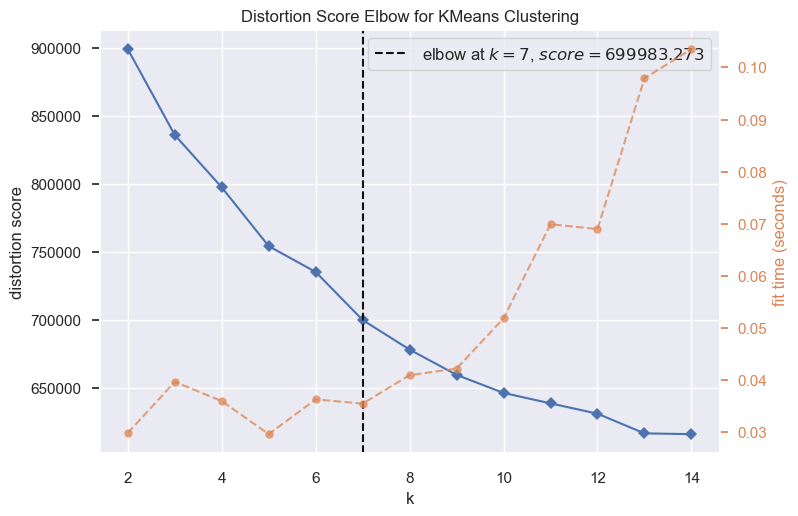

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans(random_state=42)
# Rango de k a evaluar
k = (2, 15)

# Crear el visualizador
visualizer = KElbowVisualizer(model, k=k, timings=True)

# Ajustar los datos (asegúrate de que 'cluster' es tu DataFrame de features numéricas)
visualizer.fit(cluster)

# Mostrar la gráfica
visualizer.show()

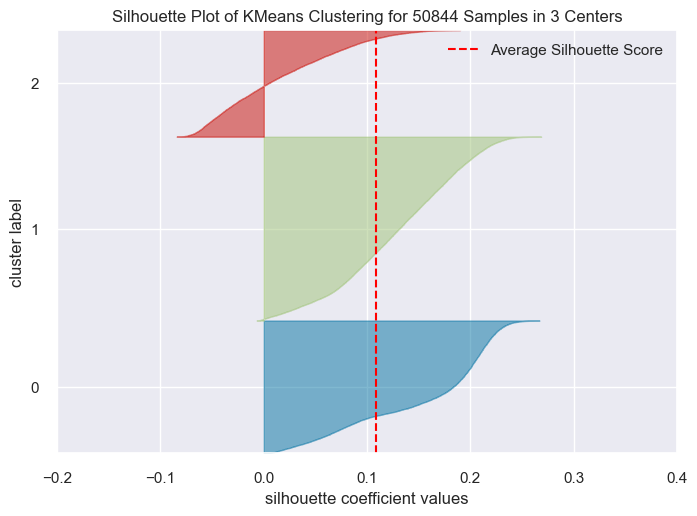

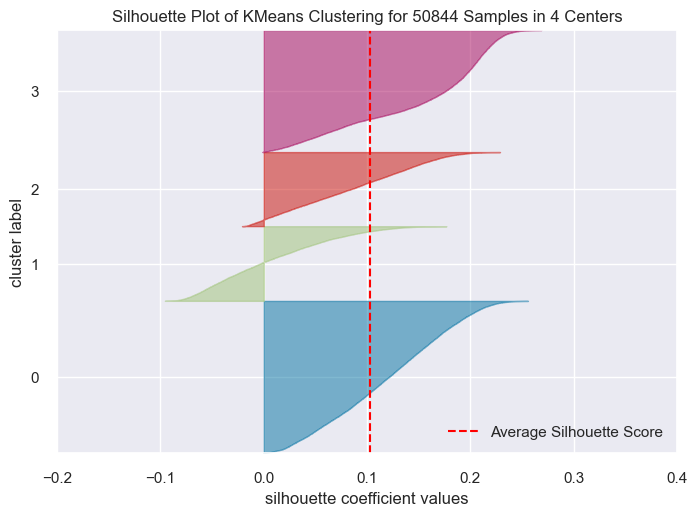

KeyboardInterrupt: 

In [20]:
# Silueta para n_clusters = 3
n_clusters = 3
est_3 = KMeans(n_clusters=n_clusters, random_state=42)
est_3.fit(cluster)

sil_visualizer_3 = SilhouetteVisualizer(est_3, colors='yellowbrick')
sil_visualizer_3.fit(cluster)
sil_visualizer_3.show()

# Silueta para n_clusters = 4
n_clusters = 4
est_4 = KMeans(n_clusters=n_clusters, random_state=42)
est_4.fit(cluster)

sil_visualizer_4 = SilhouetteVisualizer(est_4, colors='yellowbrick')
sil_visualizer_4.fit(cluster)
sil_visualizer_4.show()

# Silueta para n_clusters = 5
n_clusters = 5
est_5 = KMeans(n_clusters=n_clusters, random_state=42)
est_5.fit(cluster)
sil_visualizer_5 = SilhouetteVisualizer(est_5, colors='yellowbrick')
sil_visualizer_5.fit(cluster)
sil_visualizer_5.show()

# Silueta para n_clusters = 6
n_clusters = 6
est_6 = KMeans(n_clusters=n_clusters, random_state=42)
est_6.fit(cluster)
sil_visualizer_6 = SilhouetteVisualizer(est_6, colors='yellowbrick')
sil_visualizer_6.fit(cluster)
sil_visualizer_6.show()

# Silueta para n_clusters = 7
n_clusters = 7
est_7 = KMeans(n_clusters=n_clusters, random_state=42)
est_7.fit(cluster)
sil_visualizer_7 = SilhouetteVisualizer(est_7, colors='yellowbrick')
sil_visualizer_7.fit(cluster)
sil_visualizer_7.show()

# Silueta para n_clusters = 8
n_clusters = 8
est_8 = KMeans(n_clusters=n_clusters, random_state=42)
est_8.fit(cluster)
sil_visualizer_8 = SilhouetteVisualizer(est_8, colors='yellowbrick')
sil_visualizer_8.fit(cluster)
sil_visualizer_8.show()

In [ ]:
kmeans_metrics = {
    'K': [],
    'Inertia': [],
    'Silhouette': [],
    'Davies_Bouldin': [],
    'Calinski_Harabasz': []
}

print(f"{'K':<5} {'Inertia':<15} {'Silhouette':<15} {'Davies-Bouldin':<18} {'Calinski-Harabasz':<20}")
print("-" * 78)
k_range=range(2, 11)
for k in k_range:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(cluster)
    
    # Calcular métricas
    inertia = kmeans.inertia_
    silhouette = silhouette_score(cluster, labels)
    davies_bouldin = davies_bouldin_score(cluster, labels)
    calinski_harabasz = calinski_harabasz_score(cluster, labels)
    
    # Guardar
    kmeans_metrics['K'].append(k)
    kmeans_metrics['Inertia'].append(inertia)
    kmeans_metrics['Silhouette'].append(silhouette)
    kmeans_metrics['Davies_Bouldin'].append(davies_bouldin)
    kmeans_metrics['Calinski_Harabasz'].append(calinski_harabasz)
    
    print(f"{k:<5} {inertia:<15.2f} {silhouette:<15.4f} {davies_bouldin:<18.4f} {calinski_harabasz:<20.2f}")

kmeans_df = pd.DataFrame(kmeans_metrics)


Evaluando K-Means para diferentes K (dataset completo)...

K     Inertia         Silhouette      Davies-Bouldin     Calinski-Harabasz   
------------------------------------------------------------------------------
2     899079.30       0.1117          2.5580             6661.51             
3     835970.33       0.1084          2.6686             5501.18             
4     797480.07       0.1023          2.4691             4662.31             
5     754269.98       0.1081          2.2026             4425.09             
6     727707.81       0.0975          2.2377             4040.35             
7     697566.17       0.1009          2.2431             3878.48             
8     678196.19       0.0934          2.2220             3626.71             
9     659568.81       0.0911          2.1730             3442.39             
10    646202.39       0.0823          2.2416             3239.96             

Evaluación completada.
